# 1 分裂小提琴图

In [6]:
library(pacman)
# install.packages("devtools") # 下面包不能安装时使用
# p_install_gh("psyteachr/introdataviz") #github安装R包
# devtools::install_github("psyteachr/introdataviz")
library(introdataviz)
library(tidyverse)

In [9]:
# install.packages("pacman")
# install.packages("introdataviz")
# install.packages("tidyverse")

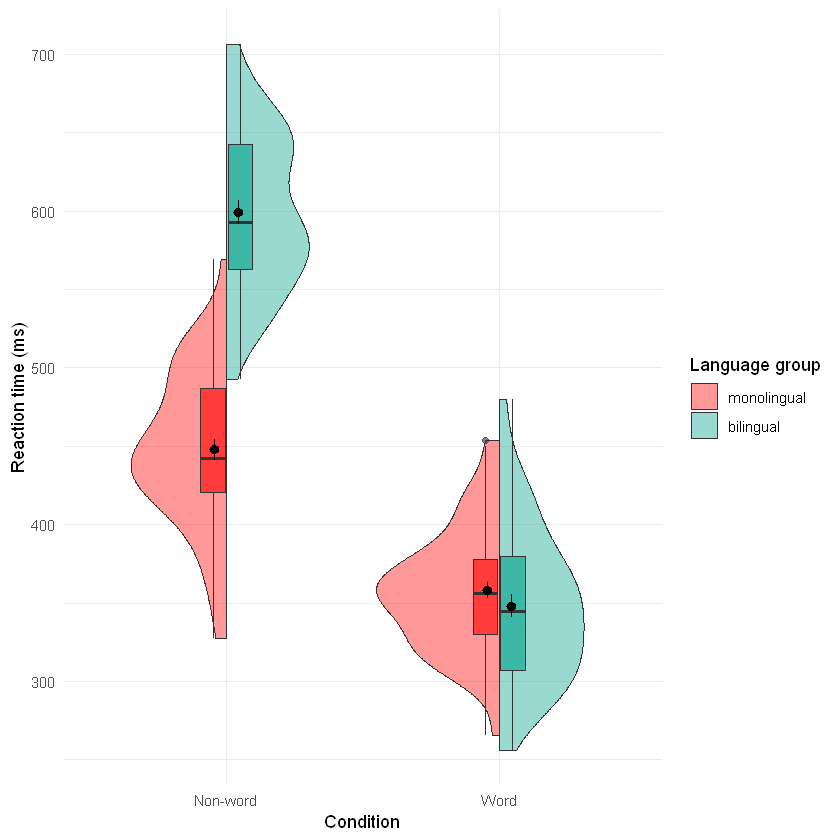

In [7]:
colours <- c("#FF0000","#00A08A")

ggplot(ldt_long, aes(x = condition, y = rt, fill = language)) +
  introdataviz::geom_split_violin(alpha = .4) +
  geom_boxplot(width = .2, alpha = .6, show.legend = FALSE) +
  stat_summary(fun.data = "mean_se", geom = "pointrange", show.legend = F, 
               position = position_dodge(.175)) +
  scale_x_discrete(name = "Condition", labels = c("Non-word", "Word")) +
  scale_y_continuous(name = "Reaction time (ms)") +
  scale_fill_manual(values = colours, name = "Language group") +
  theme_minimal()

# 2 云雨图

Warning message:
"Removed 10 rows containing missing values (violinist)."


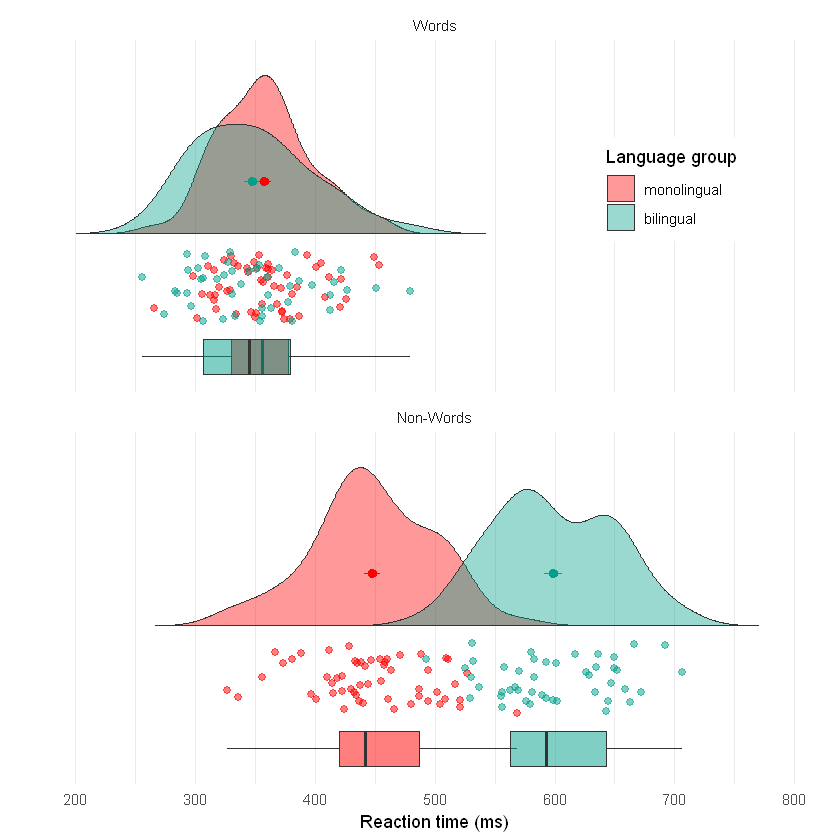

In [12]:
rain_height <- .1

ggplot(ldt_long, aes(x = "", y = rt, fill = language)) +
  introdataviz::geom_flat_violin(trim=FALSE, alpha = 0.4,
                                 position = position_nudge(x = rain_height+.05)) +
  geom_point(aes(colour = language), size = 2, alpha = .5, show.legend = FALSE, 
             position = position_jitter(width = rain_height, height = 0)) +
  geom_boxplot(width = rain_height, alpha = 0.5, show.legend = FALSE, 
               outlier.shape = NA,
               position = position_nudge(x = -rain_height*2)) +
  stat_summary(fun.data = mean_se, mapping = aes(color = language), show.legend = FALSE,
               position = position_nudge(x = rain_height * 3)) +
  scale_x_discrete(name = "", expand = c(rain_height*3, 0, 0, 0.7)) +
  scale_y_continuous(name = "Reaction time (ms)",
                     breaks = seq(200, 800, 100), 
                     limits = c(200, 800)) +
  coord_flip() +
  facet_wrap(~factor(condition, 
                     levels = c("word", "nonword"), 
                     labels = c("Words", "Non-Words")), 
             nrow = 2) +
  scale_fill_manual(values = colours, name = "Language group") +
  scale_colour_manual(values = colours) +
  theme_minimal() +
  theme(panel.grid.major.y = element_blank(),
        legend.position = c(0.8, 0.8),
        legend.background = element_rect(fill = "white", color = "white"))